
# Clustering Analysis on a Customers Dataset
Consider that we possess a dataset of customer information, and the task is to perform customer segmentation on this historical data. Customer segmentation involves dividing a customer base into distinct groups based on shared characteristics. This approach is crucial because it allows a business to target specific groups effectively and optimize the allocation of marketing resources. For instance, one segment might consist of high-profit, low-risk customers—those more likely to make purchases or subscribe to services, whom the business aims to retain. Another segment could be customers from non-profit organizations, among others.

We will perform clustering analysis on the Mall Customers Dataset. This dataset includes the `Age`, `Annual Income`, and `Spending Score` of customers. We will use K-Means and DBSCAN clustering algorithms to segment customers based on their behaviors and traits. The primary objective is to understand customer segments to tailor marketing strategies effectively.

---

#### Step 1: Data Loading and Initial Exploration

 URL: 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv'.


In [1]:
import pandas as pd
import io
import numpy as np

# Load the data
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv'


mall_customers = pd.read_csv(url)
# Write your code here
mall_customers.head(5)


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [2]:
mall_customers.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [3]:
mall_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


#### Step 2: Data Preprocessing

**Exercise 2:**
- As observed, the "Address" field in this dataset is a categorical variable. The k-means algorithm, which relies on Euclidean distance, isn't suitable for categorical data because this type of distance measure doesn't make sense for discrete variables. Therefore, we will categoical exclude features and proceed with the clustering analysis.
- Now  normalize the dataset. But why do we need normalization using __StandardScaler()__.
- Regarding missing values, the variable 'Defaulted' was the only one of shwoing NaN, but we won't use it anyway because it is categorical





In [4]:
from sklearn.preprocessing import StandardScaler

#We drop the categorical columns:
customer_numerical = mall_customers.drop(columns = ['Customer Id', 'Address', 'Defaulted'])
customer_numerical.head(5) 
#then we standardize the numerical dataset:
scaler = StandardScaler().fit(customer_numerical)
stand_data = scaler.transform(customer_numerical)
stand_data = pd.DataFrame(stand_data, columns = customer_numerical.columns.tolist() )
stand_data.head(5)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,0.742915,0.312122,-0.378790,-0.718459,-0.683811,-0.590489,-0.576525
1,1.489490,-0.766349,2.573721,1.384325,1.414474,1.512962,0.391387
2,-0.252518,0.312122,0.211712,0.268032,2.134141,0.801704,1.597554
3,-0.750235,0.312122,-0.674041,-0.718459,-0.421643,-0.754467,-0.576525
4,1.489490,-0.766349,3.311849,5.356249,3.638900,1.716094,-0.442507


In [5]:
stand_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    float64
 1   Edu              850 non-null    float64
 2   Years Employed   850 non-null    float64
 3   Income           850 non-null    float64
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   DebtIncomeRatio  850 non-null    float64
dtypes: float64(7)
memory usage: 46.6 KB


#### Step 3: Applying K-Means Clustering
For choosing in a better way the k clusters, I decide to use the Elbow method to determine at what value of K the sum of square errors (intertia) decreases significantly:

c:\Users\nico-\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\nico-\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Text(0.5, 1.0, 'Elbow method for determining K')

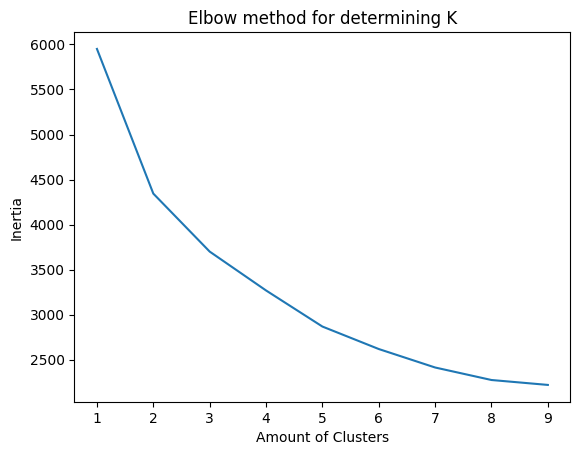

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
inertia = {}
#we iterate into 10 different possible values for K
for k in range(1,10):
    kmeans = KMeans(n_clusters= k, max_iter= 1000).fit(stand_data)
    inertia[k] = kmeans.inertia_

plt.figure()
plt.plot(list(inertia.keys()), list(inertia.values()))
plt.xlabel("Amount of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow method for determining K")



We can see that the elbow method is not too conclusive sometimes, but we will chose k = 3. Subsequently, we can check more precisely using the silhouette score in the evaluation task 

In [8]:
kmeans = KMeans(init = 'k-means++', n_clusters = 3, n_init = 100)
#we fit the model into the standardize data:
kmeans.fit(stand_data)
#get the labels:
kmeans_labels = kmeans.labels_
#then we get the centers of each cluster:
kmeans_centers = kmeans.cluster_centers_
#np.unique(kmeans_labels)
##we create the new df:
kmeans_df = customer_numerical.copy()
kmeans_df['kmeans_labels'] = kmeans_labels
print(f" the centers of the clusters are: {kmeans_centers}")



 the centers of the clusters are: [[ 0.75286974  0.57095566  1.05809885  1.76472944  2.24677134  2.25244627
   1.20165308]
 [-0.60494016 -0.01869714 -0.59826579 -0.47414521 -0.32530814 -0.37834789
  -0.07559226]
 [ 0.83688989 -0.11775794  0.74543552  0.34791014 -0.03297962  0.05621905
  -0.18587191]]



 We knoe plot the results using a scatter plot. Use `Age` as the x-axis and `Income` as the y-axis. We will use the cluster labels obtained by the kmeans algorithm as hue in this case


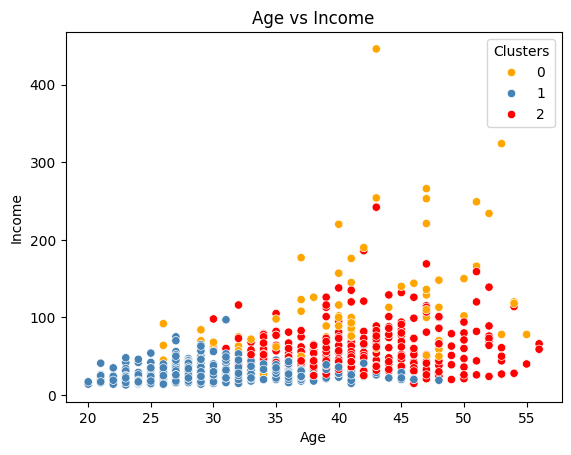

In [9]:

sns.scatterplot(x = 'Age', y = 'Income', hue = 'kmeans_labels', data = kmeans_df, palette= ['orange', 'steelblue', 'red'] )
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Age vs Income")
plt.legend( title = "Clusters")
plt.show()


In [30]:
#we display the mean of every cluster, per variable, to better answer the question. 
cluster_means = kmeans_df.groupby('kmeans_labels').mean()
print(cluster_means)


                     Age       Edu  Years Employed      Income  Card Debt  \
kmeans_labels                                                               
0              41.755245  1.601399       13.615385   60.076923   1.506752   
1              30.167689  1.693252        4.513292   28.411043   0.885673   
2              41.080000  2.240000       15.733333  114.653333   6.350293   

               Other Debt  DebtIncomeRatio  
kmeans_labels                               
0                3.269738         8.923427  
1                1.793601         9.664008  
2               10.729880        18.241333  


### Analysis of the clusters:
- The cluster 1 (blue), represents the people with the lowest income and also, the youngest ones. This is an expected behavior in the data because young people usually roughly have work experience at that time, which implies job possitions with low salaries. Looking at the above table, the mean of cluster 1 for income represents what we see in the graph, having a mean income of 28.38 (units). 

- Cluster 0 (orange), we can define it as the group of people that has mid income. In avarage, they have more income than people from cluster 1, counting up to 60 (units) approx. However, they are people from a wide range of age, and do not represent exactly young or old people, there are individuals from all ages in this cluster. 

- Finally, the cluster 2 (red), represents the people with high income, 114 (units) in avarage, which is a lot compared to the other cluster's income mean. These people, as one can expected, will be the oldest ones from all the dataset, but as you can see in the table above, they have aprrox the samen avarage age (41 years) as the people from cluster 0, the ones definied with mid income. So we cannot say precisely that Cluster 2 are the older people, but we can say they are highest income earning people.  



#### Step 4: Applying DBSCAN Clustering

We will apply DBSCAN to see the difference between both methods. 

In [10]:
from sklearn.cluster import DBSCAN
from itertools import product

We first want to make the clusters equal to 3, thus, we find all possible combinations, given a range for eps and min_samples that satisfiy the 3 cluster conditions. 

In [11]:
#we will iterate thorugh the DBSCAN parameters to find which combination will give us a total of three different classes. 
#first we create a set of possible values for both parameters. In this case, 10 different levels are given for each parameter.
eps_values = np.arange(0.1,1.1, 0.1)
min_samples_values = np.arange(1, 11, 1)
results = []
##now we iterate with two index variables to find the combination that gives 3 clusters as a result:
for eps, min_samples in product(eps_values, min_samples_values):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(stand_data)
    unique_labels = np.unique(labels[labels != -1])
    if len(unique_labels) == 3:
        results.append((eps, min_samples, labels))
#then we print the results:
for eps, min_samples, labels in results:
    print(f"Parameters: eps={eps}, min_samples={min_samples}")
    print(f"Labels obtained: {np.unique(labels)}")

Parameters: eps=0.1, min_samples=2
Labels obtained: [-1  0  1  2]
Parameters: eps=0.30000000000000004, min_samples=5
Labels obtained: [-1  0  1  2]
Parameters: eps=0.4, min_samples=6
Labels obtained: [-1  0  1  2]
Parameters: eps=0.5, min_samples=7
Labels obtained: [-1  0  1  2]
Parameters: eps=0.6, min_samples=7
Labels obtained: [-1  0  1  2]
Parameters: eps=0.6, min_samples=8
Labels obtained: [-1  0  1  2]
Parameters: eps=0.6, min_samples=9
Labels obtained: [-1  0  1  2]
Parameters: eps=0.6, min_samples=10
Labels obtained: [-1  0  1  2]
Parameters: eps=0.7000000000000001, min_samples=7
Labels obtained: [-1  0  1  2]
Parameters: eps=0.8, min_samples=8
Labels obtained: [-1  0  1  2]
Parameters: eps=0.8, min_samples=9
Labels obtained: [-1  0  1  2]
Parameters: eps=0.9, min_samples=9
Labels obtained: [-1  0  1  2]
Parameters: eps=0.9, min_samples=10
Labels obtained: [-1  0  1  2]
Parameters: eps=1.0, min_samples=10
Labels obtained: [-1  0  1  2]


we will use one of the samples given by the iteration, where eps must be 0.7 and the minimum of neighbors should be 7 in order to have 3 clusters.

In [12]:
 
dbscan = DBSCAN(eps = 0.7, min_samples= 7).fit(stand_data)
dbscan_labels = dbscan.labels_

##we calculate the number of cluster labels obtained by DBSCAN:
dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"The number of lables found by DBSCAN is {dbscan_clusters}")
#calculate the number of noise points obtained by DBSCA:
noise_points= list(dbscan_labels).count(-1)
print(f"The number of noise pints by DBSCAN is {noise_points}")
##we add the labels obtained to the datafrme:
dbscan_df = stand_data.copy()
dbscan_df['dbscan_labels'] = dbscan_labels
dbscan_df.head(5)


The number of lables found by DBSCAN is 3
The number of noise pints by DBSCAN is 464


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio,dbscan_labels
0,0.742915,0.312122,-0.378790,-0.718459,-0.683811,-0.590489,-0.576525,-1
1,1.489490,-0.766349,2.573721,1.384325,1.414474,1.512962,0.391387,-1
2,-0.252518,0.312122,0.211712,0.268032,2.134141,0.801704,1.597554,-1
3,-0.750235,0.312122,-0.674041,-0.718459,-0.421643,-0.754467,-0.576525,0
4,1.489490,-0.766349,3.311849,5.356249,3.638900,1.716094,-0.442507,-1


Now, we plot the same visualization, but using labels obtained by the DBSCAN

<Axes: xlabel='Age', ylabel='Income'>

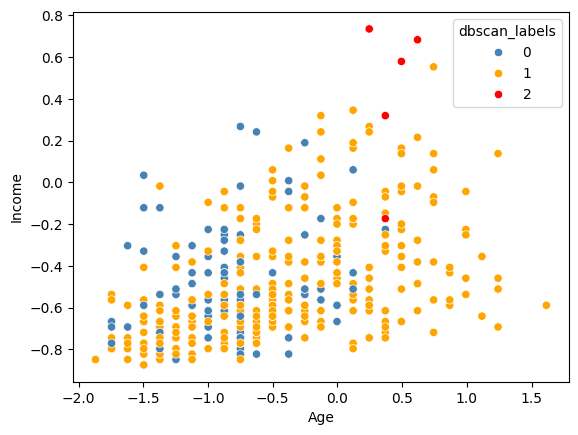

In [13]:
#we first take out the '-1' values, which represents the noise points: 
dbscan_df_filtered = dbscan_df[dbscan_df['dbscan_labels'] != -1]
dbscan_filtered_labels = dbscan_df_filtered['dbscan_labels']
np.unique(dbscan_df_filtered['dbscan_labels'])

#then we make the plot:
sns.scatterplot(x = 'Age', y = 'Income', hue = 'dbscan_labels', data = dbscan_df_filtered, palette= ['steelblue', 'orange', 'red'])

DBSCAN performs worst at first glance, because, for the Cluster 2 for example, cannot get a decent parition. As we increase epsilon and min_samples, the number of outliers decreases. But the only way to check the real performance is computing an evaluation metric 

#### Step 5: Evaluation and Interpretation

We will calculate the sillhout score for each model

In [14]:
from sklearn.metrics import silhouette_score


In [15]:
#for k-means:
Silhouette_score_kmeans = silhouette_score(stand_data, kmeans_labels, metric='euclidean')
print(f"Sillhouette Score for K means model is : {Silhouette_score_kmeans}")
#for dbscan (without noise):
Silhouette_score_dbscan = silhouette_score(dbscan_df_filtered, dbscan_filtered_labels, metric='euclidean')
print(f"Silhoutte Score for DBSCAN model is {Silhouette_score_dbscan}")

Sillhouette Score for K means model is : 0.2336017808502604
Silhoutte Score for DBSCAN model is 0.23040356235528997


Both models perform really poor, because the desirable sillhouette score should be at least >0.5. This is because in order to a clustering model to diverge into a reasonable partition, the dataset should have a bigger sample size (number of rows). In this case Kmeans shows a better performance in comparision of DBSCAN algorithm. This could be because the dataset doesn't contain significant outliers that can influence badly the partition performed by Kmeans. This can also be because the clusters obtained by Kmeans are roughly spherical and evenly sized, assuming similar variance for each group and equal distributed around the centroids. 

**Performing hyperparameter tunning for DBSCAN** (as an extra)

In [16]:
from sklearn.model_selection import ParameterGrid
dbscan = DBSCAN()
#we create the range of parameters:
#we create a dictionary for iteration (we will have two use two index variabels in the loop)
parameters = {'eps': np.arange(0.1,1.1, 0.1),
'min_samples': np.arange(1, 11, 1)}
#using parametergrid library, 
best_score = -1
best_params = None
best_n_clusters = None
best_n_noise = None
param_combinations = list(ParameterGrid(parameters))
###
for params in param_combinations:
   #we create DBSCAN model, fit it into the data and take the labels:
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    labels = dbscan.fit_predict(stand_data)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
## we restrict the number of clusters to be minimum 2 and maximum 5, otherwise the tunning will give us unlogical amount of clusters for maximizing sillhoute score:
    if 2 <= n_clusters <= 4:
        score = silhouette_score(stand_data, labels)
        if score > best_score:
            best_score = score
            best_params = params
            best_n_clusters = n_clusters
            best_n_noise = n_noise

print("Best Silhouette Score:", best_score)
print("Best Parameters: eps =", best_params['eps'], "min_samples =", best_params['min_samples'])
print("Number of Clusters:", best_n_clusters)
print("Number of Noise Points:", best_n_noise)





Best Silhouette Score: 0.05332372916693995
Best Parameters: eps = 1.0 min_samples = 6
Number of Clusters: 4
Number of Noise Points: 219


In this case the sillhoute score takes into account noise points, and that is why is close to zero

# The end

I hope this was useful for your data science projects. Looking forward to see you again!